In [1]:
from manim import *
from classes.christmas_fourier_classes import *
from PIL import Image
import jupyter_capture_output

video_scene = f" -v WARNING --disable_caching cf_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s cf_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


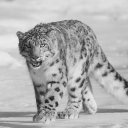

In [2]:
# reading the image
image_snow_leopard1 = Image.open('external_media/SnowLeopard1_128.jpg')
image_snow_leopard2 = Image.open('external_media/SnowLeopard2_128.jpg')

# convert image to greyscale
image_snow_leopard1_greyscale = image_snow_leopard1.convert('L')

# creating a numpy array from the greyscale picture (division of the greyscale values by 2 to fit the properties of the encoding)
image_snow_leopard1_greyscale_array = np.array(image_snow_leopard1_greyscale)


# returning an omega_xyc tupel for given image coordinates and greyscale
def get_omega_xyc(i_row, j_column, image_array):
    omega_x_encoded = j_column + 128                                                            # turns row number into the correct frequency by adding 128
    omega_y_encoded = 3*128 - i_row - 1                                                         # turns column number into its correspoding frequency
    omega_c_encoded = image_array[i_row, j_column] / 2 + 3*128                                  # calculates the greyscale value into its frequency
    return (omega_x_encoded, omega_y_encoded, omega_c_encoded)


# creating iterators with encoded values used by the animation
encoded_data_list = []
for i_row in range(128):
    for j_column in range(128):
        encoded_data_list.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))


# iterating through the image via spiral from outside to inside
encoded_data_list_spiral = []
track_list = []
i_row = 0
j_column = 0
row_start = 1
row_end = 128
column_start = 0
column_end = 128
while (column_start != column_end and row_start != row_end):
    while (j_column < column_end):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        j_column += 1
    j_column -= 1
    column_end -=1
    i_row += 1
    while (i_row < row_end):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        i_row += 1
    i_row -= 1
    row_end -=1
    j_column -= 1
    while (j_column >= column_start):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        j_column -= 1
    j_column += 1
    column_start +=1
    i_row -= 1
    while (i_row >= row_start):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        i_row -= 1
    i_row += 1
    row_start += 1
    j_column += 1


# LANGER SCHWANZ FÜR DIE LISTE DAMIT DER HS NICHT NACH 2 STUNDEN WEGEN 1 ITERELEMENTS RUMHEULT
for i in range(100):
    encoded_data_list_spiral.append((191, 319, 3*128))


# shows the original 128x128 image
image_snow_leopard1_greyscale.save("external_media/SnowLeopard1_greyscale.jpg")
image_snow_leopard1_greyscale

In [3]:
%%capture_video --path "animations/christmas_fourier/christmas_fourier_singlewave_WHITE.mp4"
%%manim -qh --fps 64 $video_scene


class cf_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # initial signal an their iter
        init_signal_omega_xyc = encoded_data_list_spiral[0]
        encoded_data_iter = iter(encoded_data_list_spiral)
        # amplitude list plus iter
        amplitude_list = [x**4 for x in np.linspace(0, 1, 3*64 + 1)]
        amplitude_iter = iter(amplitude_list)


        # coordinate system for the total initial superposition of waves
        full_signal_box = FullSignal(position = np.array([0, 0, 0]))
        self.add(full_signal_box)
        # full wave and baseline with their iters ()
        full_wave_baseline = full_signal_box.get_wave(init_signal_omega_xyc, amplitude = 0, wave_opacity = 1)
        full_wave_baseline.iter = amplitude_iter
        full_wave = full_signal_box.get_wave(init_signal_omega_xyc, amplitude = 1, wave_opacity = 1)
        full_wave.iter = encoded_data_iter


        # updating the wave amplitudes into starting position
        def wave_amplitude_updater(wave):
            next_amplitude = next(wave.iter)
            wave.become(full_signal_box.get_wave(init_signal_omega_xyc, amplitude = next_amplitude, wave_opacity = 1))


        # wave updater
        def wave_updater(wave):
            next_signal_omega_xyc = next(wave.iter)
            wave.become(full_signal_box.get_wave(next_signal_omega_xyc, amplitude = 1, wave_opacity = 1))
            #self.add(full_signal_box.get_wave(next_signal_omega_xyc, amplitude = 1, wave_opacity = 0.5))


        self.add(full_wave_baseline)
        self.wait(1)
        full_wave_baseline.add_updater(wave_amplitude_updater)
        t_tracker = ValueTracker(0)
        self.play(t_tracker.animate.set_value(1), rate_func = linear, run_time = 3)
        full_wave_baseline.remove_updater(wave_amplitude_updater)
        self.add(full_wave)
        self.remove(full_wave_baseline)
        full_wave.add_updater(wave_updater)
        self.play(t_tracker.animate.set_value(2), rate_func = linear, run_time = 128/2)

Output saved by creating file at animations/christmas_fourier/christmas_fourier_singlewave_WHITE.mp4.


KeyboardInterrupt: 

In [6]:
%%capture_video --path "animations/christmas_fourier/christmas_fourier_multiwave_PURE_WHITE.mp4"
%%manim -qh --fps 64 $video_scene


class cf_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE        
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)


        # initial signal
        init_signal_omega_xyc = encoded_data_list_spiral[0]
        init_signal_omega_x = encoded_data_list[0][0]
        init_signal_omega_y = encoded_data_list[0][1]
        init_signal_omega_c = encoded_data_list[0][2]
        # creating the iter from the signals
        encoded_data_iter = iter(encoded_data_list_spiral)
        encoded_x_data_iter = iter([omega_xyc[0] for omega_xyc in encoded_data_list_spiral])
        encoded_y_data_iter = iter([omega_xyc[1] for omega_xyc in encoded_data_list_spiral])
        encoded_c_data_iter = iter([omega_xyc[2] for omega_xyc in encoded_data_list_spiral])


        # split waves with their iters and mother class
        split_signal_x_box = SplitSignal(position = np.array([3.75, 2.5, 0]), height = 1.25, width = 5, description = "1. Frequenz: x-Koordinate", color = PURE_RED)
        split_wave_x = split_signal_x_box.get_wave(init_signal_omega_x)
        split_wave_x.mother_class = split_signal_x_box
        split_wave_x.iter = encoded_x_data_iter

        split_signal_y_box = SplitSignal(position = np.array([3.75, 0.5, 0]), height = 1.25, width = 5, description = "2. Frequenz: y-Koordinate", color = PURE_BLUE)
        split_wave_y = split_signal_y_box.get_wave(init_signal_omega_y)
        split_wave_y.mother_class = split_signal_y_box
        split_wave_y.iter = encoded_y_data_iter

        split_signal_c_box = SplitSignal(position = np.array([3.75, -1.5, 0]), height = 1.25, width = 5, description = "3. Frequenz: Graustufe", color = DARK_GREY)
        split_wave_c = split_signal_c_box.get_wave(init_signal_omega_c)
        split_wave_c.mother_class = split_signal_c_box
        split_wave_c.iter = encoded_c_data_iter

        self.add(split_signal_x_box, split_signal_y_box, split_signal_c_box)
        self.add(split_wave_x, split_wave_y, split_wave_c)


        # updates the individual waves on the right
        def wave_updater(wave):
            next_signal_omega_xyc = next(wave.iter)
            wave.become(wave.mother_class.get_wave(next_signal_omega_xyc))
            

        # square with the untransformed signal 
        signal_box = IncomingSignal(position = (-3.25, 0.5, 0), height = 4, width = 5)
        #self.add(signal_box)

        # setting up the signals using the methods of the boxes             
        init_signal = signal_box.get_signal(init_signal_omega_xyc)
        init_signal.iterator = encoded_data_iter
        init_signal.ft_signal = signal_box.get_ft_signal(init_signal_omega_xyc)
        #self.add(init_signal, init_signal.ft_signal)


        # updates an incoming signal and its fourier transform
        def signal_updater(signal):
            next_signal_omega_xyc = next(signal.iterator)
            signal.ft_signal.become(signal_box.get_ft_signal(next_signal_omega_xyc))
            signal.become(signal_box.get_signal(next_signal_omega_xyc)) 


        self.wait(4)
        #init_signal.add_updater(signal_updater)
        split_wave_x.add_updater(wave_updater)
        split_wave_y.add_updater(wave_updater)
        split_wave_c.add_updater(wave_updater)
        t_tracker = ValueTracker(0)
        self.play(t_tracker.animate.set_value(1), rate_func = linear, run_time = 128/2) # 64 for multiwave, 128 for multiwave + fourier
        self.wait(5)

Output saved by creating file at animations/christmas_fourier/christmas_fourier_multiwave_PURE_WHITE.mp4.


In [ ]:
%%capture_video --path "animations/christmas_fourier/christmas_fourier_start.mp4"
%%manim -qh --fps 64 $video_scene


class cf_Scene(Scene):
    def construct(self):
        #self.camera.background_color = WHITE

        # a fake signal alongside the starting signal
        show_signal_omega_xyc = (180, 290, encoded_data_list_spiral[0][2])
        init_signal_omega_xyc = encoded_data_list_spiral[0]

        # square with the transformed image
        image_box = FTransformedImage(position = np.array([3.75, 0.5, 0]), size = 4)

        # square with the untransformed signal 
        signal_box = IncomingSignal(position = (-3.25, 0.5, 0), height = 4, width = 5)
        self.add(signal_box)


        # setting up the signal using the methods of the boxes             
        show_signal = signal_box.get_signal(show_signal_omega_xyc)                                      # the untransformed show signal wave
        show_signal.pixel = image_box.get_pixel(show_signal_omega_xyc)                                  # the first pixel of the recreated image
        show_signal.pixel_arm = image_box.get_pixel_arm(show_signal_omega_xyc)                          # the descriptor on both axes of the first pixel
        show_signal.ft_signal = signal_box.get_ft_signal(show_signal_omega_xyc)                         # the fourier-transformed signal wave

        init_signal = signal_box.get_signal(init_signal_omega_xyc)                                      # the initial untransformed signal wave
        init_signal.pixel = image_box.get_pixel(init_signal_omega_xyc)                                  # the first pixel of the recreated image
        init_signal.pixel_arm = image_box.get_pixel_arm(init_signal_omega_xyc)                          # the descriptor on both axes of the first pixel
        init_signal.ft_signal = signal_box.get_ft_signal(init_signal_omega_xyc)                         # the fourier-transformed signal wave
        

        self.wait(1.5)
        self.play(Create(show_signal), run_time = 5)
        self.wait(3)
        self.play(Create(show_signal.ft_signal), run_time = 5)
        self.wait(3)
        self.play(FadeIn(image_box), run_time = 3)
        self.wait(1.5)
        self.play(TransformFromCopy(show_signal.ft_signal, show_signal.pixel), FadeIn(show_signal.pixel_arm), run_time = 3)
        self.wait(3)
        self.play(
            FadeTransform(show_signal, init_signal), 
            FadeTransform(show_signal.ft_signal, init_signal.ft_signal), 
            FadeOut(show_signal.pixel), FadeIn(init_signal.pixel), 
            FadeOut(show_signal.pixel_arm), FadeIn(init_signal.pixel_arm), 
            run_time = 3)
        self.wait(3)

In [ ]:
# ffmpeg -i snow_leopard.mp4 -r 128 -vf "setpts=0.5*PTS" snow_leopard_2x.mp4
# ffmpeg -i snow_leopard_2x.mp4 -ss 00:00:00 -t 00:02:15 snow_leopard_2x_cut.mp4

# ffmpeg -i snow_leopard_WHITE.mp4 -r 60 -vf "setpts=0.5*PTS" snow_leopard_WHITE_2x.mp4
# ffmpeg -i snow_leopard_WHITE_2x.mp4 -ss 00:00:00 -t 00:02:15 snow_leopard_WHITE_2x_cut.mp4

# ffmpeg -i snow_leopard_PURE_WHITE.mp4 -r 60 -vf "setpts=0.5*PTS" snow_leopard_PURE_WHITE_2x.mp4
# ffmpeg -i snow_leopard_PURE_WHITE_2x.mp4 -ss 00:00:00 -t 00:02:15 snow_leopard_PURE_WHITE_2x_cut.mp4